### About the dataset (Health Insurance Data)

The dataset contains information about 1300 individuals regarding insurance charges. The data contains an individual's basic information like age, sex, bmi, the region of residence and so on. 

Attribute Information:

**age**: Age of the individual

**gender**: Gender of the individual

**bmi**: Body mass index of the individual

**bp**: Systolic blood pressure in mm/hg

**children**: Number of children of the individual

**smoker**: Individual is smoker or not

**region**: Individual's region of residence

**medical_cost**: Individual's medical costs billed by the insurance company

**Import the required libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

#### Load the health insurance dataset and check the first five observations

In [2]:
df = pd.read_csv('health_insurance.csv')
df.head()

,age,gender,bmi,bp,children,region,smoker,medical_cost
0,23,M,31.900,157,0,southwest,smoker,16884.92400
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520


### Let's begin with some hands-on practice exercises

<a id="uni"> </a>
## 1. Univariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any extreme observations present in 'bmi'? Support your answer with a plot
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

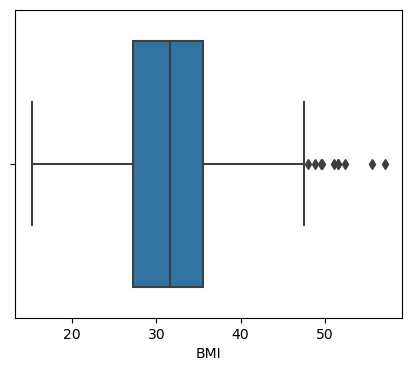

In [3]:
plt.figure(figsize = (5,4))
sns.boxplot(x=df['bmi'])
plt.xlabel('BMI')
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Is the variable 'age' skewed? Support your answer with a plot and metric</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Skewness of Age is 0.04354761280268155



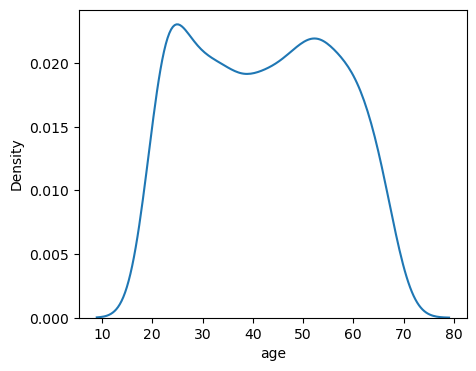

In [4]:
age_skew = stats.skew(df['age'])
print('Skewness of Age is',age_skew)
print()
plt.figure(figsize = (5,4))
sns.kdeplot(df['age'])
plt.show()

The skewness is 0.04 which is close to zero. Hence, there is no skewness present in the age variable.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. What is the probability that the individuals have charged less than 25k for medical treatment? Support your answer with the plot</b>
                </font>
            </div>
        </td>
    </tr>
</table>

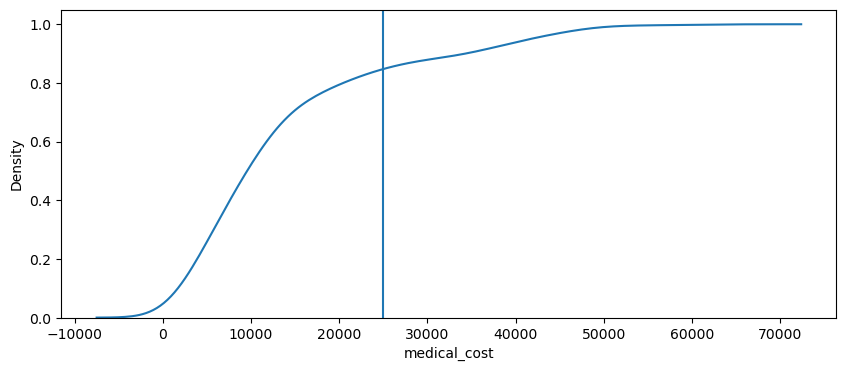

In [5]:
plt.figure(figsize = (10,4))
sns.kdeplot(df['medical_cost'],cumulative=True)
plt.axvline(25000)
plt.show()

From the above kde-cumulative graph it is evident that medical cost of 25,000 is 0.8 to the x-axis. This can be inferred as, there exist 80% chance of medical cost for individuals being less than 25,000

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Draw the line for mean and median on the distribution plot and identify the type of skewness for BMI</b>
                </font>
            </div>
        </td>
    </tr>
</table>

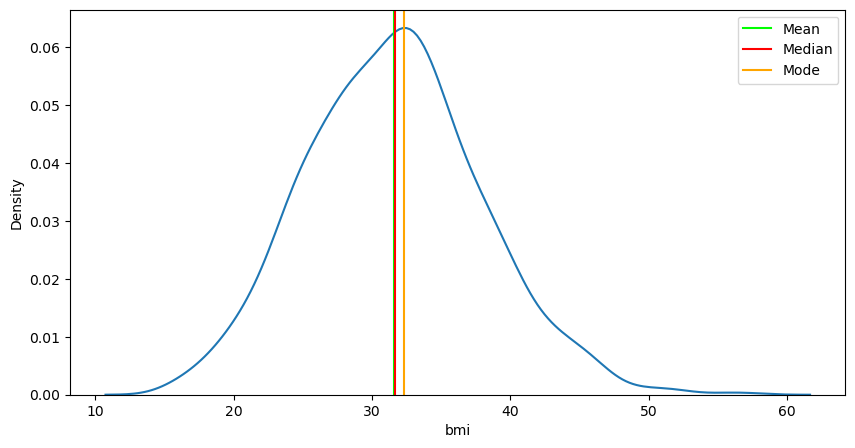

In [6]:
plt.figure(figsize = (10,5))
sns.distplot(df['bmi'],hist=False)
plt.axvline(df['bmi'].mean(),label='Mean',color='lime')
plt.axvline(df['bmi'].median(),label='Median',color='red')
plt.axvline(df['bmi'].mode()[0],label='Mode',color='orange')
plt.legend()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Visualize the distribution of medical cost using violin plot and describe its distribution</b>
                </font>
            </div>
        </td>
    </tr>
</table>

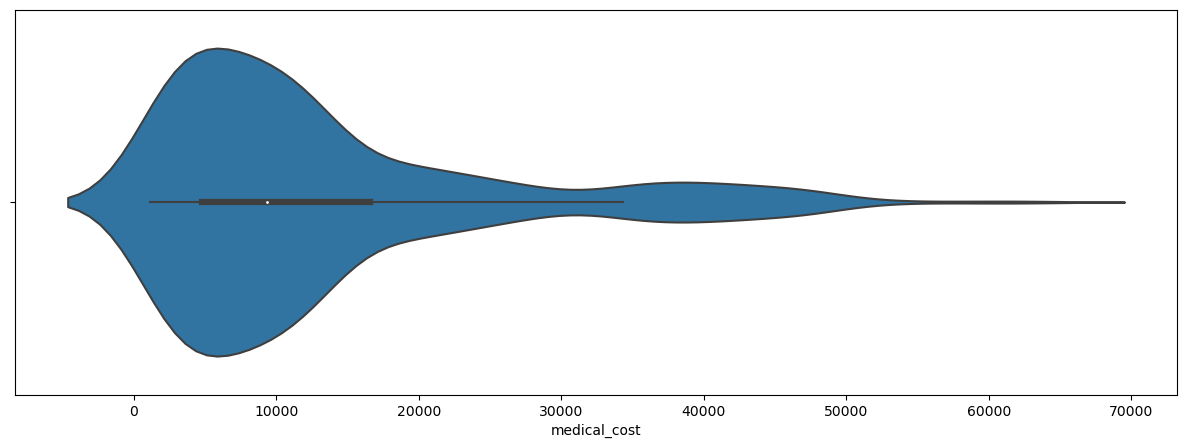

In [7]:
plt.figure(figsize=(15,5))
sns.violinplot(x=df['medical_cost'])
plt.show()

In [8]:
stats.skew(df['medical_cost'])

1.5324146738368425

From the violin plot and the skew value we can interpret that medical cost follows a positively skewed distribution with longer tails on the right.

Eventhough most individuals have lesser medical cost (mode), on an average the medical cost for individuals are higher in the give data.

<a id="multi"> </a>
## 2. Multivariate Analysis

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Is there any individual with age less than 30 and meadical cost greater than 40k?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [9]:
df[(df['age']<30) & (df['medical_cost']>40000)]

,age,gender,bmi,bp,children,region,smoker,medical_cost
254,26,F,47.54,156,2,northeast,smoker,42112.2356
1009,25,F,55.58,152,1,northeast,smoker,44501.3982
1086,26,M,41.75,152,1,northeast,smoker,40904.1995


Yes, there are three individuals with age less than 30 and medical cost greater than 40000.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Does the scatter plot of BMI and medical cost reveal potential outliers?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

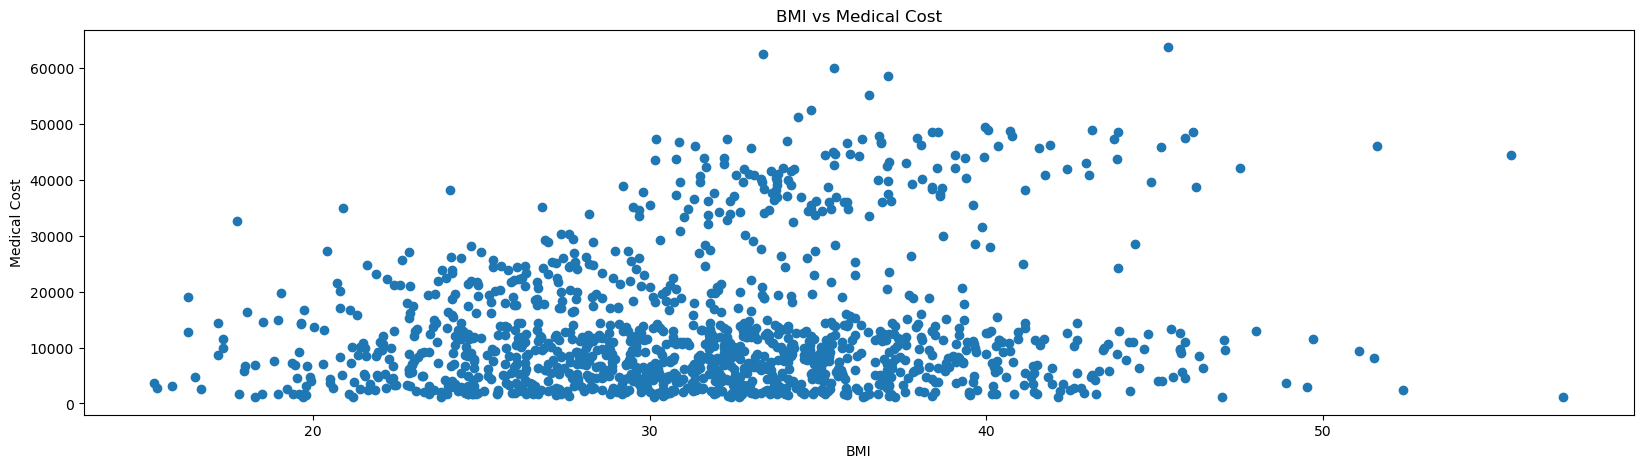

In [10]:
plt.figure(figsize = (20,5))
plt.scatter(x = df['bmi'],y = df['medical_cost'])
plt.xlabel('BMI')
plt.ylabel('Medical Cost')
plt.title('BMI vs Medical Cost')
plt.show()

Yes, there exist outliers.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Determine the percentage variation in BMI for males and females

</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
pct_var = (df.groupby('gender')['bmi'].std()/df.groupby('gender')['bmi'].mean())*100
pct_var

gender
F    20.120029
M    20.118324
Name: bmi, dtype: float64

There isn't much difference in the percent variation of BMI between gender in the give dataset.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Which region has the highest number of males?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
df[df['gender']=='M'].groupby('region')['gender'].count().nlargest(1)

region
southeast    178
Name: gender, dtype: int64

Southeast has the highest number of Males with a count of 178.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Analyze the pairwise relationship between the numeric variables
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

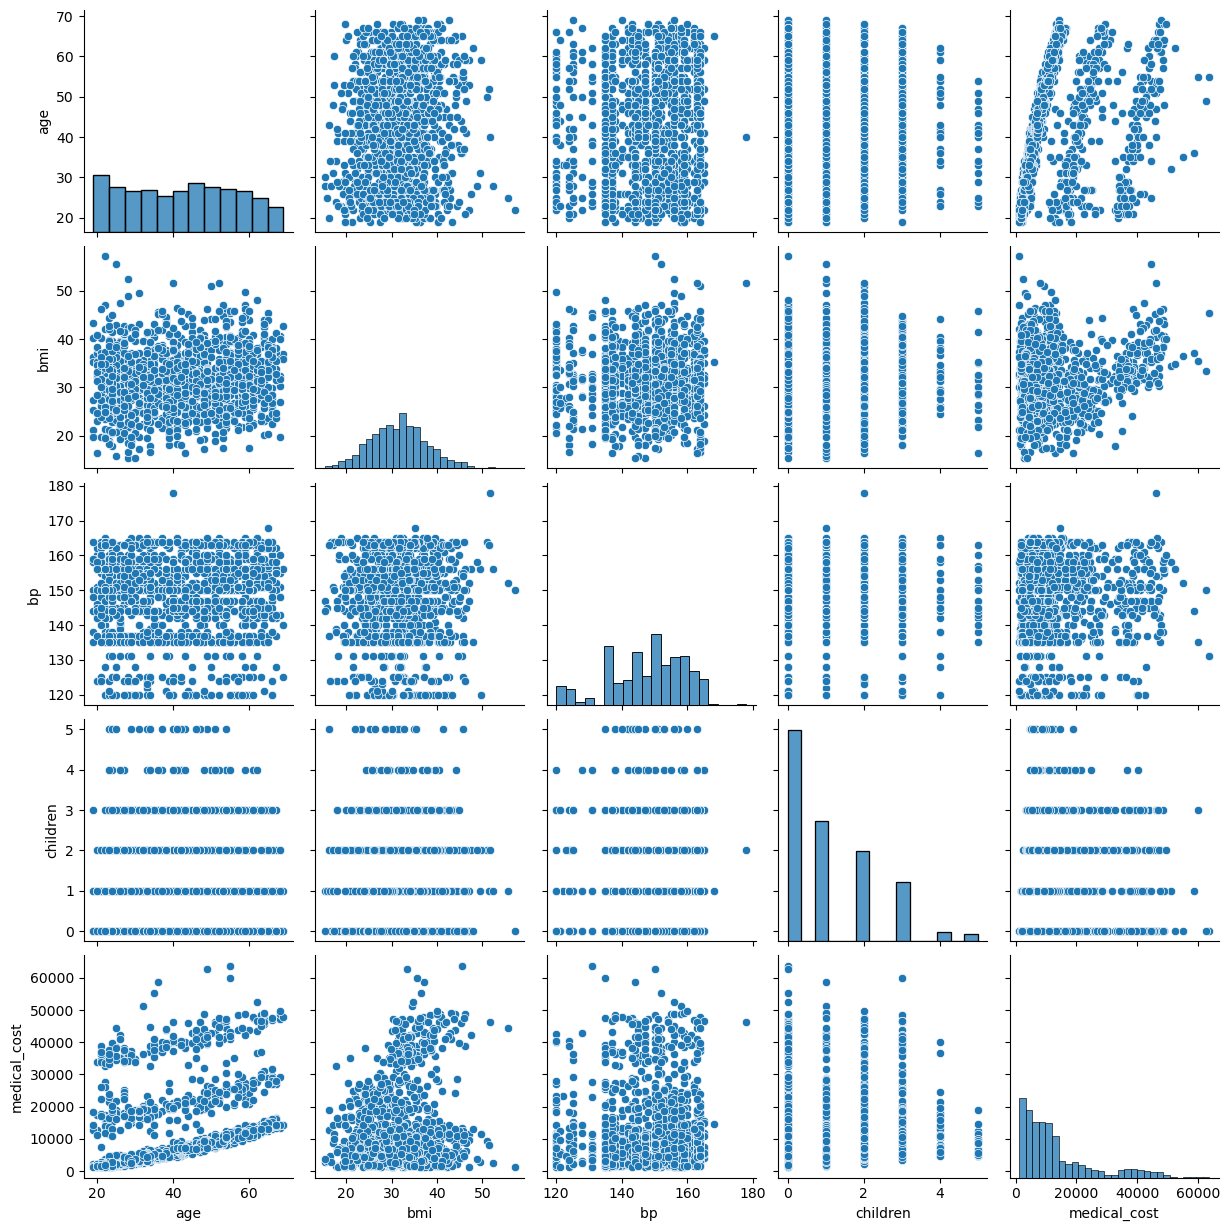

In [13]:
sns.pairplot(df.select_dtypes(include=np.number))

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. Are the medical costs affected by an individual's smoking habits?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

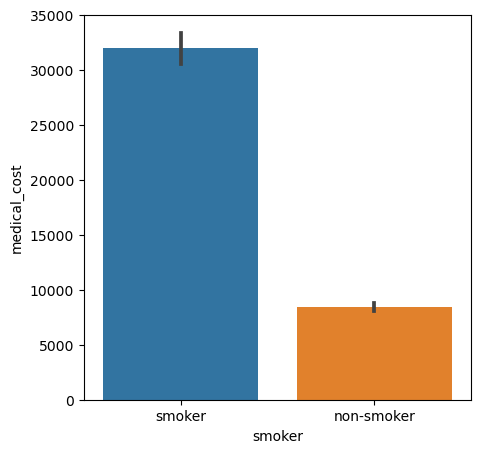

In [14]:
plt.figure(figsize = (5,5))
sns.barplot(data=df,x='smoker',y='medical_cost')
plt.show()

yes, As the above barplot shows that the average medical cost is over 30,000 for Smokers and less than 10,000 for Non-Smokers.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Check if the region of residence and age of the individuals have an impact on the medical cost? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

region
northeast    Axes(0.125,0.11;0.775x0.77)
northwest    Axes(0.125,0.11;0.775x0.77)
southeast    Axes(0.125,0.11;0.775x0.77)
southwest    Axes(0.125,0.11;0.775x0.77)
dtype: object

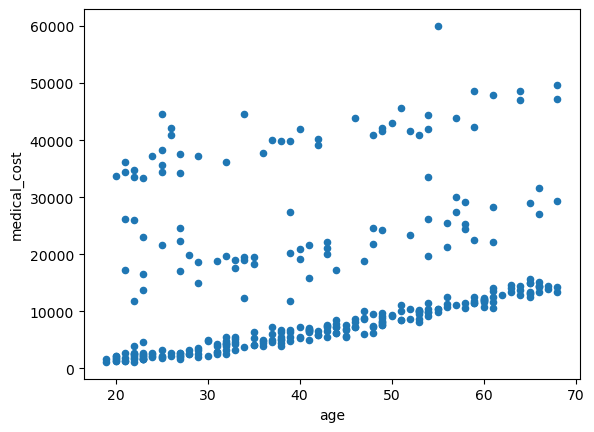

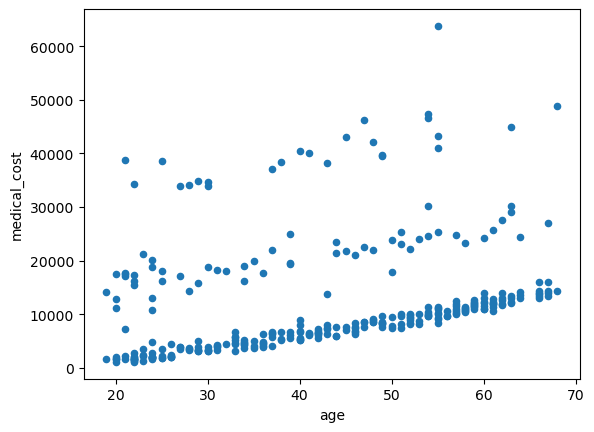

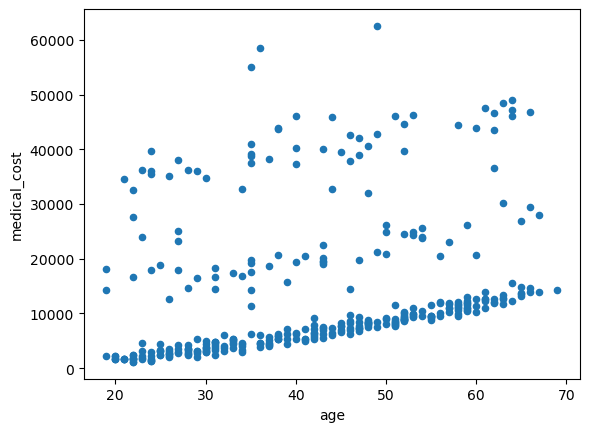

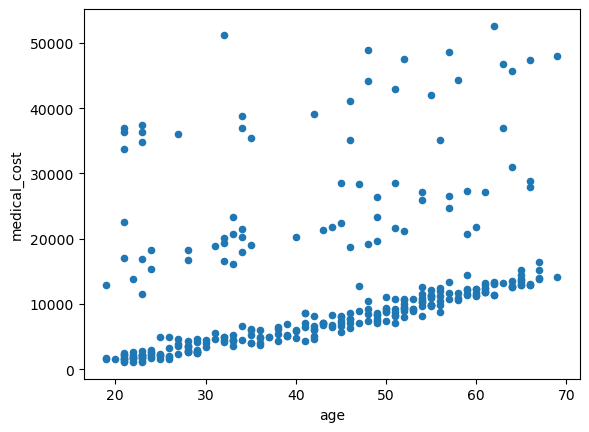

In [15]:
df.groupby('region').plot(x='age',y='medical_cost',kind='scatter')

<a id="cat"> </a>
## 3. Handle Non-Numeric Data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. Create a dummy variable for each category in 'region' 
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
pd.get_dummies(df['region'])

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1295,0,0,0,1
1296,1,0,0,0
1297,0,0,1,0
1298,0,1,0,0


In [17]:
pd.concat([df,pd.get_dummies(df['region'])],axis=1).head(3)

,age,gender,bmi,bp,children,region,smoker,medical_cost,northeast,northwest,southeast,southwest
0,23,M,31.90,157,0,southwest,smoker,16884.9240,0,0,0,1
1,20,F,36.77,160,1,southeast,non-smoker,1725.5523,0,0,1,0
2,33,F,35.00,145,3,southeast,non-smoker,4449.4620,0,0,1,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Create a variable 'smoker_label' containing unique label for each category in the variable 'smoker'
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
le = LabelEncoder()

df['smoker_label'] = le.fit_transform(df['smoker'])
df[['smoker','smoker_label']].head(10)

,smoker,smoker_label
0,smoker,1
1,non-smoker,0
2,non-smoker,0
3,non-smoker,0
4,non-smoker,0
5,non-smoker,0
6,non-smoker,0
7,non-smoker,0
8,smoker,1
9,non-smoker,0


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Create a variable which will contain the frequency of an individual's gender</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
freq_calc = df.groupby('gender').size()/df.shape[0]
freq_calc

gender
F    0.505385
M    0.494615
dtype: float64

In [20]:
df['gender_freq_encode'] = df['gender'].map(freq_calc)
df.head(6)

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,gender_freq_encode
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385
5,33,M,25.740,152,0,southeast,non-smoker,3756.62160,0,0.494615


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. Create a variable such that the value '1' indicates that the individual is a smoker and '0' indicates a non-smoker</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
df['smoker_label_lambda'] = df['smoker'].apply(lambda x:1 if x=='smoker' else 0)
df.head(10)

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,gender_freq_encode,smoker_label_lambda
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,1
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,0
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,0
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,0
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,0
5,33,M,25.740,152,0,southeast,non-smoker,3756.62160,0,0.494615,0
6,48,M,31.440,150,1,southeast,non-smoker,8240.58960,0,0.494615,0
7,26,F,21.845,140,0,northwest,non-smoker,2395.17155,0,0.505385,0
8,36,M,31.920,137,1,northeast,smoker,37701.87680,1,0.494615,1
9,60,M,27.720,142,3,northwest,non-smoker,14001.13380,0,0.494615,0


<a id="norm"> </a>
## 4. Normalization

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. Transform BMI such that it will have mean zero and variance one</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
# Standardization or z-score normalization transforms the data into a standard form with mean = 0 and variance = 1.
from sklearn.preprocessing import StandardScaler

standard_scale = StandardScaler()

df['BMI_stndrd_scale'] = standard_scale.fit_transform(df[['bmi']])

df.head(5)

,age,gender,bmi,bp,children,region,smoker,medical_cost,smoker_label,gender_freq_encode,smoker_label_lambda,BMI_stndrd_scale
0,23,M,31.900,157,0,southwest,smoker,16884.92400,1,0.494615,1,0.050142
1,20,F,36.770,160,1,southeast,non-smoker,1725.55230,0,0.505385,0,0.816583
2,33,F,35.000,145,3,southeast,non-smoker,4449.46200,0,0.505385,0,0.538020
3,37,F,23.705,153,0,northwest,non-smoker,21984.47061,0,0.505385,0,-1.239588
4,36,F,27.880,156,0,northwest,non-smoker,3866.85520,0,0.505385,0,-0.582526


In [23]:
print('Mean of BMI after Standardization:',int(df['BMI_stndrd_scale'].mean()))

Mean of BMI after Standardization: 0


In [24]:
print('Variance of BMI after Standardization:',df['BMI_stndrd_scale'].var())

Variance of BMI after Standardization: 1.0007698229407238


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Check the range of 'age' and transform the values such that the range will be 1</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [25]:
# Using MinMax Scaler to attain range 1
min_max = MinMaxScaler()

df['age_min_max_scale'] = min_max.fit_transform(df[['age']])

print('Range BEFORE Min Max Scale Fit:',df['age'].max()-df['age'].min())
print()
print('Range AFTER Min Max Scale Fit:',df['age_min_max_scale'].max()-df['age_min_max_scale'].min())

Range BEFORE Min Max Scale Fit: 50

Range AFTER Min Max Scale Fit: 1.0


<a id="trans"> </a>
## 5. Transformation Techniques

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Check the skewness for 'medical_cost'. If the data is skewed, then use the appropriate technique to reduce the skewness in the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
print('The skewness of Medical Cost is',df['medical_cost'].skew())

The skewness of Medical Cost is 1.5341854555059415


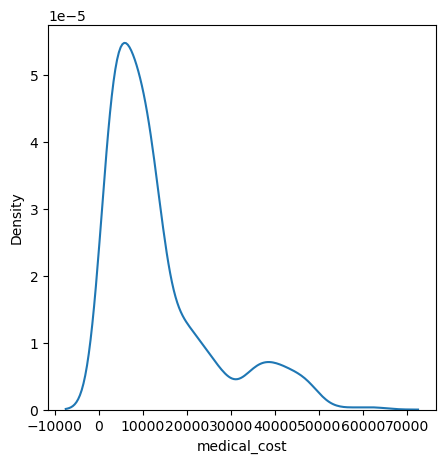

In [27]:
plt.figure(figsize = (5,5))
sns.distplot(df['medical_cost'],hist=False)
plt.show()

From the above distribution plot and skew value, we can identify that medical cost is right/positively skewed.

In [28]:
# log transformation
df['log_medical_cost'] = np.log(df['medical_cost'])

print('Skewness after log transformations is',df['log_medical_cost'].skew())

Skewness after log transformations is -0.09331493541417472


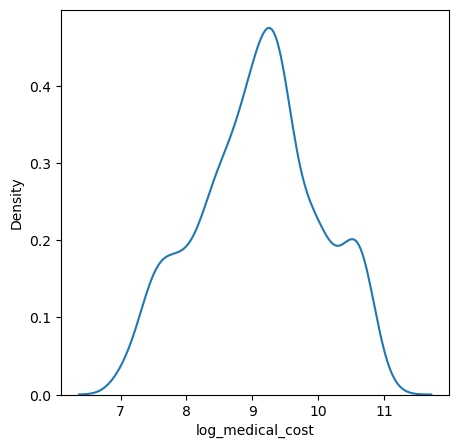

In [29]:
plt.figure(figsize = (5,5))
sns.distplot(df['log_medical_cost'],hist=False)
plt.show()

Therefore, skewness reduced after log transformation for the variable medical cost.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Transform the 'log_medical_cost' values to the original scale and compare the 'medical_cost' and the transformed data</b>
                </font>
            </div>

</td>
    </tr>
</table>

In [30]:
df['log_to_norm_med_cost'] = np.exp(df['log_medical_cost'])

print('Skewness of medical cost is',df['medical_cost'].skew())
print('Skewness of log to normal medical cost is',df['log_to_norm_med_cost'].skew())

Skewness of medical cost is 1.5341854555059415
Skewness of log to normal medical cost is 1.5341854555059418


The skewness is back to the value attained in normal medical cost data.

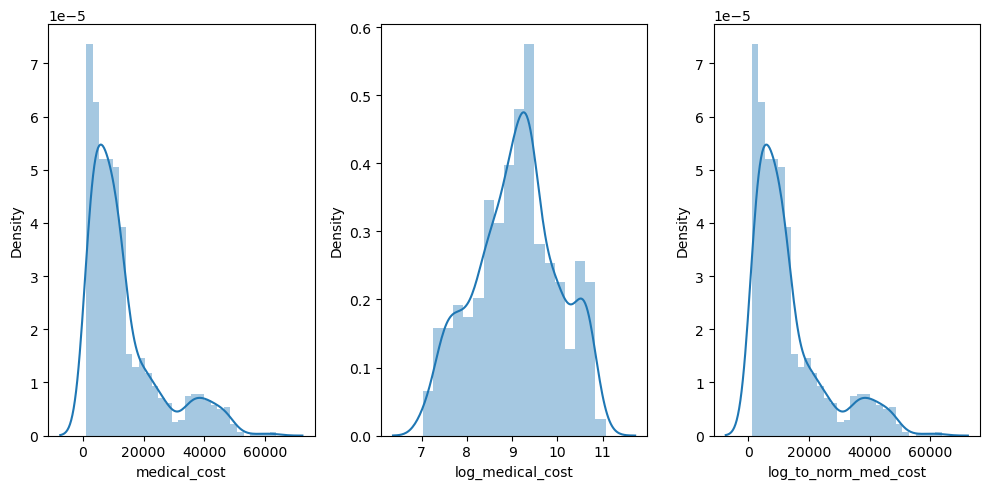

In [31]:
fig,axes = plt.subplots(1,3,figsize=(10,5))
sns.distplot(df['medical_cost'],ax=axes[0])
sns.distplot(df['log_medical_cost'],ax=axes[1])
sns.distplot(df['log_to_norm_med_cost'],ax=axes[2])

plt.tight_layout()
plt.show()

The first plot is the original data of medical cost and the second is log transformed medical cost data that is normally distributed, the third one is again a return back to original form using exponential function.